In [6]:
import yfinance as yf
import pandas as pd
import requests
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
from datetime import datetime

In [10]:
def download_yfinance_data(tickers, start_date, end_date):
    """
    Download historical stock data from Yahoo Finance for the given tickers and date range.
    Combine all data into a single DataFrame with a fixed daily index.
    """
    date_dataframe = pd.DataFrame(pd.date_range(start=start_date, end=end_date, freq='D'), columns=['Date'])

    for ticker in tqdm(tickers):
        try:
            data_ticker = yf.download(ticker, start=start_date, end=end_date, multi_level_index=False)
            if not data_ticker.empty:
                # Determine which column to use
                close_column = 'Adj Close' if 'Adj Close' in data_ticker.columns else 'Close'
                data_extract = data_ticker[[close_column]].rename(columns={close_column: ticker})
                date_dataframe = date_dataframe.merge(data_extract, left_on='Date', right_index=True, how='left')
        except Exception as e:
            print(f"Error for {ticker}: {e}")

    return date_dataframe

In [11]:
def get_all_tickers():
    # API URL
    url = "https://api.nasdaq.com/api/screener/stocks?tableonly=true&download=true"
    # Headers (User-Agent is required to avoid access restrictions)
    headers = {"User-Agent": "Mozilla/5.0"}

    # Fetch data from the API
    response = requests.get(url, headers=headers)
    data = response.json()

    # Extract relevant rows
    rows = data.get("data", {}).get("rows", [])

    # Create DataFrame
    df_result = pd.DataFrame(rows, columns=["symbol", "name", "country", "ipoyear", "industry"])

    # Display the first few rows
    return df_result

In [12]:
# df = pd.read_csv("Data/yfinance_data.csv")

In [13]:
# df_all_tickers = get_all_tickers() #6898

In [14]:
# start_date = "2024-01-01"
# end_date = "2024-12-31"
# tickers = df_all_tickers['symbol'].to_list()  # Example tickers
# # tickers = ['AAPL','MSFT','GOOGL']
#
# df = download_yfinance_data(tickers, start_date, end_date)
#
# if df is not None:
#     df.to_csv("Data/yfinance_data.csv")
#     print("Data successfully downloaded and saved to yfinance_data.csv")

In [15]:
# df = df.set_index('Date')
# df_clean = df.dropna(axis=1, thresh=int(len(df.index)/2), inplace=False)
# # df_filled = df_clean.interpolate(method='linear')
# # c = df_filled.corr().abs()
# c = df_clean.corr().abs()
# # Remove self-correlation and keep only one side of the matrix
# c = c.where(~np.tril(np.ones(c.shape), k=0).astype(bool))
# s = c.unstack()
# so = s.sort_values(kind="quicksort", ascending=False).reset_index()
# so.columns = ['ticker_1', 'ticker_2', 'correlation']
# so.to_csv('ticker_correlations.zip')

In [16]:
# so[so['correlation']<1]


In [17]:

wiki_data=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies') # Open the link and download S&P company details in a table
data = wiki_data[0] # All data is stored in first cell
sorted_data = data.sort_values(by=['Symbol'], ascending=True) # Sort the dataframe on ticker in alphabetical ascending order
# Convert the dataframe to csv file
sorted_data.to_csv('Data/S&P500Tickers.csv', mode='w', index=False) #index is False as we don't want to write index in csv file
sorted_data

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
9,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,"Santa Clara, California",2000-06-05,1090872,1999
39,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193,1977
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
11,ABNB,Airbnb,Consumer Discretionary,"Hotels, Resorts & Cruise Lines","San Francisco, California",2023-09-18,1559720,2008
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969


In [18]:
# Analysis on snp500 only
start_date = "2020-01-01"
end_date = "2025-01-31"
tickers = sorted_data['Symbol'].to_list()  # Example tickers

df = download_yfinance_data(tickers, start_date, end_date)

if df is not None:
    df.to_csv("Data/yfinance_snp500_data_202001_202501.csv")
    print("Data successfully downloaded and saved to yfinance_data.csv")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Data successfully downloaded and saved to yfinance_data.csv


In [66]:
df = df.set_index('Date')

In [19]:
# df = df.set_index('Date')
df_clean = df.dropna(axis=1, thresh=int(len(df.index)/2), inplace=False)
# df_filled = df_clean.interpolate(method='linear')
# c = df_filled.corr().abs()
c = df_clean.corr().abs()
# Remove self-correlation and keep only one side of the matrix
c = c.where(~np.tril(np.ones(c.shape), k=0).astype(bool))
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False).reset_index()
so.columns = ['ticker_1', 'ticker_2', 'correlation']
so.to_csv('Data/snp500_correlations_202001_202501.zip')

In [6]:
# read csv files
# df = pd.read_csv("yfinance_snp500_data_202001_202501.csv")
# so = pd.read_csv('snp500_correlations_202001_202501.zip')

In [20]:
so[so['correlation']<1]

,ticker_1,ticker_2,correlation
0,GOOGL,GOOG,0.999768
1,LEN,DHI,0.994664
2,VMC,MLM,0.991180
3,SNPS,CDNS,0.990591
4,FOXA,FOX,0.990033
...,...,...,...
121766,INVH,ES,0.000039
121767,GPC,C,0.000026
121768,LW,EXR,0.000023
121769,PFE,HES,0.000022


In [21]:
## check for cointegration
def check_stationarity(series):
    """Returns the p-value from the Augmented Dickey-Fuller (ADF) test."""
    return adfuller(series)[1]  # ADF test p-value

def calculate_cointegration(corr_df, timeseries_df):
    """
    Takes in:
    - corr_df: DataFrame with columns ['ticker1', 'ticker2', 'correl']
    - timeseries_df: DataFrame where each column is a ticker's time series.

    Adds three new columns:
    - 'p1_stationary': ADF p-value for ticker1
    - 'p2_stationary': ADF p-value for ticker2
    - 'p_cointegration': Cointegration test p-value
    """

    results = []  # Store results for efficient DataFrame construction

    for index, row in corr_df.iterrows():
        t1, t2 = row["ticker_1"], row["ticker_2"]

        # Get time series data
        series1 = timeseries_df[t1].dropna()
        series2 = timeseries_df[t2].dropna()

        # Ensure both series have the same length
        min_len = min(len(series1), len(series2))
        series1, series2 = series1.iloc[-min_len:], series2.iloc[-min_len:]

        # Check stationarity (ADF test)
        p1 = check_stationarity(series1)
        p2 = check_stationarity(series2)

        # Check cointegration only if both series are non-stationary (p > 0.05)
        if p1 > 0.05 and p2 > 0.05:
            p_cointegration1 = coint(series1, series2, trend='c')[1]  # Engle-Granger test p-value
            p_cointegration2 = coint(series2, series1, trend='c')[1]
        else:
            p_cointegration1 = np.nan  # Not applicable
            p_cointegration2 = np.nan

        results.append((t1, t2, p1, p2, p_cointegration1, p_cointegration2))

    # Convert results into DataFrame and merge with original correlation DataFrame
    results_df = pd.DataFrame(results, columns=["ticker_1", "ticker_2", "p1_stationary", "p2_stationary", "p_cointegration1", "p_cointegration2"])
    return corr_df.merge(results_df, on=["ticker_1", "ticker_2"])

corr_df = calculate_cointegration(so, df)
corr_df.to_csv('Data/SnP500cointegration_results_temp2.csv')
corr_df['p_coint_avg'] = corr_df[['p_cointegration1', 'p_cointegration2']].mean(axis=1, skipna=True)
corr_df['p_coint_min'] = corr_df[['p_cointegration1', 'p_cointegration2']].min(axis=1, skipna=True)
corr_df['p_coint_max'] = corr_df[['p_cointegration1', 'p_cointegration2']].max(axis=1, skipna=True)
corr_df.to_csv('Data/SnP500cointegration_results_202001_202501.csv')

C:\Users\Joey Tian\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:957: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\Joey Tian\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:957: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\Joey Tian\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:957: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\Joey Tian\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:957: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\Joey Tian\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:957: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) 

In [32]:
promising_pairs1 = corr_df[(corr_df['p_coint_max']>0) &
        (corr_df['p_coint_max']<0.01) &
        (corr_df['p1_stationary']>=0.05) &
        (corr_df['p2_stationary']>=0.05) &
        (~corr_df['correlation'].isna())
        ].sort_values(by='p_coint_max', ascending=True)

In [36]:
promising_pairs1['regress1on2'] = promising_pairs1['p_cointegration1'] < promising_pairs1['p_cointegration2']

In [37]:
promising_pairs1

,ticker_1,ticker_2,correlation,p1_stationary,p2_stationary,p_cointegration1,p_cointegration2,p_coint_avg,p_coint_min,p_coint_max,regress1on2
145,BSX,AVGO,0.972910,0.999035,0.994512,0.000006,2.047569e-06,0.000004,2.047569e-06,0.000006,False
218,AVGO,APO,0.969204,0.994512,0.997732,0.000005,7.565022e-06,0.000006,4.621492e-06,0.000008,True
251,HWM,AVGO,0.967475,1.000000,0.994512,0.000011,9.634495e-07,0.000006,9.634495e-07,0.000011,False
204,WAB,AVGO,0.969750,0.997958,0.994512,0.000016,1.063658e-05,0.000013,1.063658e-05,0.000016,False
52,WAB,ANET,0.979521,0.997958,1.000000,0.000037,2.877475e-05,0.000033,2.877475e-05,0.000037,False
...,...,...,...,...,...,...,...,...,...,...,...
2219,OKE,ADP,0.933828,0.915051,0.895535,0.009952,7.911901e-03,0.008932,7.911901e-03,0.009952,False
1986,NOC,EOG,0.936582,0.630683,0.782850,0.008028,9.957268e-03,0.008992,8.027542e-03,0.009957,True
27027,NUE,INCY,0.761040,0.531823,0.277358,0.009960,2.220931e-03,0.006090,2.220931e-03,0.009960,False
9731,ODFL,MDLZ,0.870320,0.342550,0.304451,0.009964,6.141849e-03,0.008053,6.141849e-03,0.009964,False


In [69]:
def plot_dual_axis(df, ticker1, ticker2):
    """
    Plots two time series on separate y-axes.

    Parameters:
        df (pd.DataFrame): DataFrame containing the time series.
        ticker1 (str): First ticker (plotted on left y-axis).
        ticker2 (str): Second ticker (plotted on right y-axis).
    """
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # First time series (ticker1)
    ax1.plot(df.index, df[ticker1], marker=".", markersize=1, color="b", label=ticker1)
    ax1.set_xlabel("Date")
    ax1.set_ylabel(f"{ticker1} Value", color="b")
    ax1.tick_params(axis="y", labelcolor="b")
    ax1.grid(True, linestyle="--", alpha=0.5)

    # Second time series (ticker2) on secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(df.index, df[ticker2], marker=".", markersize=1, color="r", label=ticker2)
    ax2.set_ylabel(f"{ticker2} Value", color="r")
    ax2.tick_params(axis="y", labelcolor="r")

    # Legend
    fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
    plt.title(f"{ticker1} vs {ticker2} Time Series")

    # Show plot
    plt.show()

In [18]:
def plot_same_axis(df, ticker1, ticker2, factor1=1, factor2=1):
    """
    Plots two time series on the same y-axis.

    Parameters:
        df (pd.DataFrame): DataFrame containing the time series.
        ticker1 (str): First ticker to plot.
        ticker2 (str): Second ticker to plot.
        factor1 (float, optional): Multiplicative factor for the first series. Default is 1.
        factor2 (float, optional): Multiplicative factor for the second series. Default is 1.
    """
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot both series on the same axis
    ax.plot(df.index, df[ticker1] * factor1, marker=".", markersize=1, color="b", label=ticker1)
    ax.plot(df.index, df[ticker2] * factor2, marker=".", markersize=1, color="r", label=ticker2)

    # Labels and title
    ax.set_xlabel("Date")
    ax.set_ylabel("Value")
    ax.set_title(f"{ticker1} vs {ticker2} Time Series")
    ax.legend()
    ax.grid(True, linestyle="--", alpha=0.5)

    # Show plot
    plt.show()

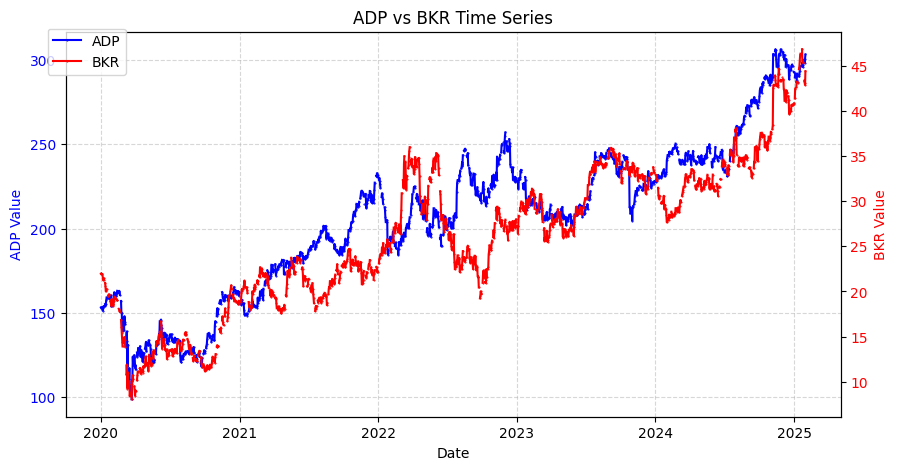

In [71]:
plot_dual_axis(df, "ADP", "BKR")  # Pass any two tickers


In [42]:
def get_cointegration_factor(ticker_1_series, ticker_2_series, f_1on2):
    """
    Calculates the cointegration factor (β) using OLS regression without an intercept.

    Parameters:
        df (pd.DataFrame): DataFrame containing time series data.
        ticker_1 (str): Independent variable.
        ticker_2 (str): Dependent variable.
        f_1on2 (bool): Determines if its series1~series2 or series2~series1

    Returns:
        float: Cointegration factor (β), or NaN if computation fails.
    """
    try:
        series1 = ticker_1_series.dropna()
        series2 = ticker_2_series.dropna()

        # Ensure both series have the same length
        min_len = min(len(series1), len(series2))
        if min_len < 20:
            return np.nan  # Not enough data points

        series1, series2 = series1.iloc[-min_len:], series2.iloc[-min_len:]
        if (f_1on2):
            # OLS Regression: ticker_1 ~ ticker_2 (without intercept)
            model = sm.OLS(series1, series2, hasconst=True).fit()
        else:
            model = sm.OLS(series2, series1, hasconst=True).fit()
        return model.params[0]  # Extract β coefficient (slope)

    except Exception as e:
        print("Exception occurred ",e )
        return np.nan  # Return NaN if an error occurs

In [44]:
promising_pairs1['coint_factor'] = promising_pairs1.apply(lambda row: get_cointegration_factor(df[row['ticker_1']], df[row['ticker_2']], row['regress1on2']), axis=1)


In [73]:
promising_pairs1.to_csv('Data/promising_pairs1.csv', index=False)

In [132]:
promising_pairs1.head()

,ticker_1,ticker_2,correlation,p1_stationary,p2_stationary,p_cointegration1,p_cointegration2,p_coint_avg,p_coint_min,p_coint_max,regress1on2,coint_factor
145,BSX,AVGO,0.972910,0.999035,0.994512,0.000006,2.047569e-06,0.000004,2.047569e-06,0.000006,False,0.572145
218,AVGO,APO,0.969204,0.994512,0.997732,0.000005,7.565022e-06,0.000006,4.621492e-06,0.000008,True,0.872942
251,HWM,AVGO,0.967475,1.000000,0.994512,0.000011,9.634495e-07,0.000006,9.634495e-07,0.000011,False,0.573996
204,WAB,AVGO,0.969750,0.997958,0.994512,0.000016,1.063658e-05,0.000013,1.063658e-05,0.000016,False,1.195107
52,WAB,ANET,0.979521,0.997958,1.000000,0.000037,2.877475e-05,0.000033,2.877475e-05,0.000037,False,2.197396


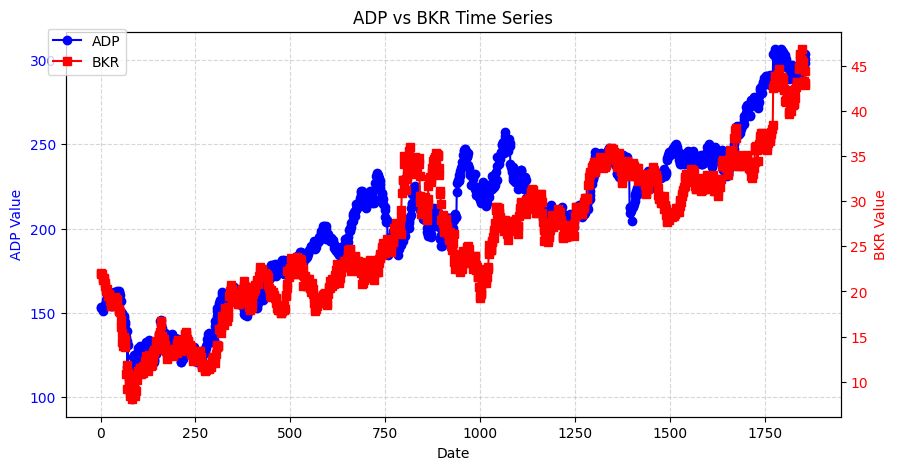

In [54]:
plot_dual_axis(df, "ADP", "BKR")

In [48]:
get_cointegration_factor(df['ADP'], df['BKR'],True)

0.12744798758111703

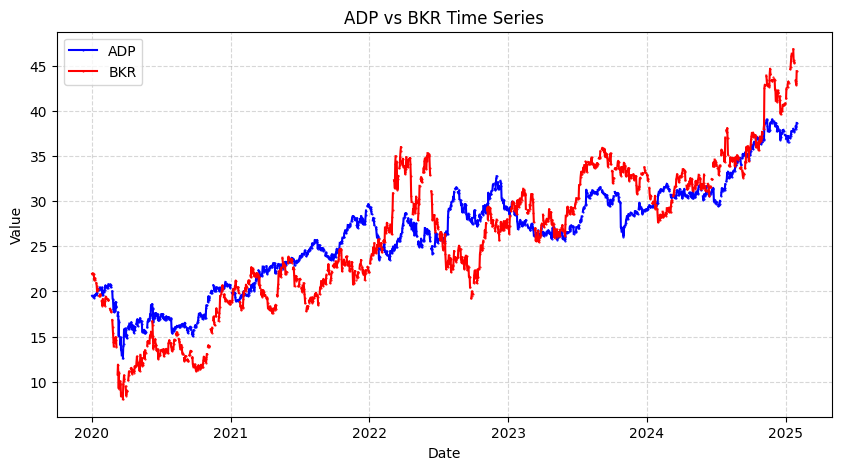

In [93]:
plot_same_axis(df, "ADP", "BKR",0.12744798758111703, 1)

In [139]:
def calculate_residuals(series_y, series_x, beta):


    residuals = series_y / (beta * series_x) - 1
    mean = residuals.mean()
    std = residuals.std()
    residuals_std = (residuals - mean) / std
    return residuals, residuals_std, mean, std

In [140]:
promising_pairs1[['coint_resid_mean', 'coint_resid_std']] = promising_pairs1.apply(
    lambda row: pd.Series(
        calculate_residuals(df[row['ticker_1']], df[row['ticker_2']], row['coint_factor'])[2:4]
        if row['regress1on2']
        else calculate_residuals(df[row['ticker_2']], df[row['ticker_1']], row['coint_factor'])[2:4]
    ),
    axis=1
)


In [141]:
promising_pairs1['current']

,ticker_1,ticker_2,correlation,p1_stationary,p2_stationary,p_cointegration1,p_cointegration2,p_coint_avg,p_coint_min,p_coint_max,regress1on2,coint_factor,coint_resid_mean,coint_resid_std
145,BSX,AVGO,0.972910,0.999035,0.994512,0.000006,2.047569e-06,0.000004,2.047569e-06,0.000006,False,0.572145,1.315728,0.793696
218,AVGO,APO,0.969204,0.994512,0.997732,0.000005,7.565022e-06,0.000006,4.621492e-06,0.000008,True,0.872942,0.095113,0.241549
251,HWM,AVGO,0.967475,1.000000,0.994512,0.000011,9.634495e-07,0.000006,9.634495e-07,0.000011,False,0.573996,1.804662,0.496571
204,WAB,AVGO,0.969750,0.997958,0.994512,0.000016,1.063658e-05,0.000013,1.063658e-05,0.000016,False,1.195107,-0.454328,0.158727
52,WAB,ANET,0.979521,0.997958,1.000000,0.000037,2.877475e-05,0.000033,2.877475e-05,0.000037,False,2.197396,-0.839787,0.049822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,OKE,ADP,0.933828,0.915051,0.895535,0.009952,7.911901e-03,0.008932,7.911901e-03,0.009952,False,0.272657,14.059882,3.736430
1986,NOC,EOG,0.936582,0.630683,0.782850,0.008028,9.957268e-03,0.008992,8.027542e-03,0.009957,True,0.230589,20.869672,7.556196
27027,NUE,INCY,0.761040,0.531823,0.277358,0.009960,2.220931e-03,0.006090,2.220931e-03,0.009960,False,1.421117,-0.356453,0.497555
9731,ODFL,MDLZ,0.870320,0.342550,0.304451,0.009964,6.141849e-03,0.008053,6.141849e-03,0.009964,False,2.508022,-0.826722,0.042908


In [146]:
def get_latest_resid(symbol_y, symbol_x, beta, mean, std):
    latest_y = yf.Ticker(symbol_y).fast_info['lastPrice']
    latest_x = yf.Ticker(symbol_x).fast_info['lastPrice']
    latest_resid = latest_y / (beta * latest_x) - 1
    return (latest_resid - mean)/std

promising_pairs1['current_signal'] = promising_pairs1.apply(lambda row: get_latest_resid(row['ticker_1'], row['ticker_2'], row['coint_factor'], row['coint_resid_mean'], row['coint_resid_std']) if row['regress1on2'] else get_latest_resid(row['ticker_2'], row['ticker_1'], row['coint_factor'], row['coint_resid_mean'], row['coint_resid_std']), axis=1)


In [188]:
promising_pairs1[promising_pairs1['current_signal'].abs() > 2.5]

,ticker_1,ticker_2,correlation,p1_stationary,p2_stationary,p_cointegration1,p_cointegration2,p_coint_avg,p_coint_min,p_coint_max,regress1on2,coint_factor,coint_resid_mean,coint_resid_std,current_signal
204,WAB,AVGO,0.969750,0.997958,0.994512,0.000016,0.000011,0.000013,0.000011,0.000016,False,1.195107,-0.454328,0.158727,2.584848
183,RL,JPM,0.971434,0.996973,0.996910,0.000169,0.000380,0.000275,0.000169,0.000380,True,1.174558,-0.296052,0.058146,3.337362
159,DECK,AVGO,0.972275,0.998633,0.994512,0.000635,0.000524,0.000580,0.000524,0.000635,False,1.040765,-0.134442,0.140598,3.985575
293,PM,MO,0.965681,0.970588,0.800445,0.000944,0.000526,0.000735,0.000526,0.000944,False,2.256283,-0.801514,0.011398,-3.667006
3300,GRMN,DVA,0.922158,0.988186,0.846206,0.001632,0.000667,0.001149,0.000667,0.001632,False,1.110366,-0.166796,0.092527,-2.799982
1384,PM,PEG,0.944544,0.970588,0.894706,0.002486,0.001465,0.001976,0.001465,0.002486,False,1.433547,-0.510248,0.035813,-3.160951
13304,HRL,ES,0.846042,0.636613,0.277631,0.003314,0.000949,0.002132,0.000949,0.003314,False,0.561308,2.188815,0.248100,2.631311
556,GD,ABBV,0.959132,0.801838,0.777157,0.003434,0.003356,0.003395,0.003356,0.003434,False,1.635387,-0.632897,0.032320,4.319894
15238,STZ,HST,0.833637,0.222519,0.175241,0.003965,0.003070,0.003518,0.003070,0.003965,False,14.375949,-0.995214,0.000492,3.109545
1572,URI,AVGO,0.941775,0.941321,0.994512,0.002506,0.005074,0.003790,0.002506,0.005074,True,0.199245,27.634800,5.204254,-2.570931


<Axes: xlabel='Date'>

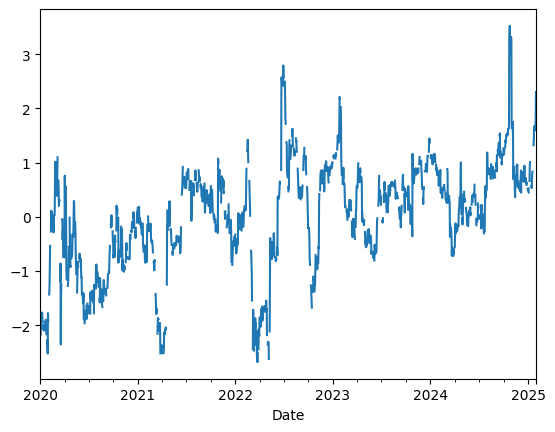

In [187]:
calculate_residuals(df['MO'], df['PM'],2.2562831761575657)[1].plot()

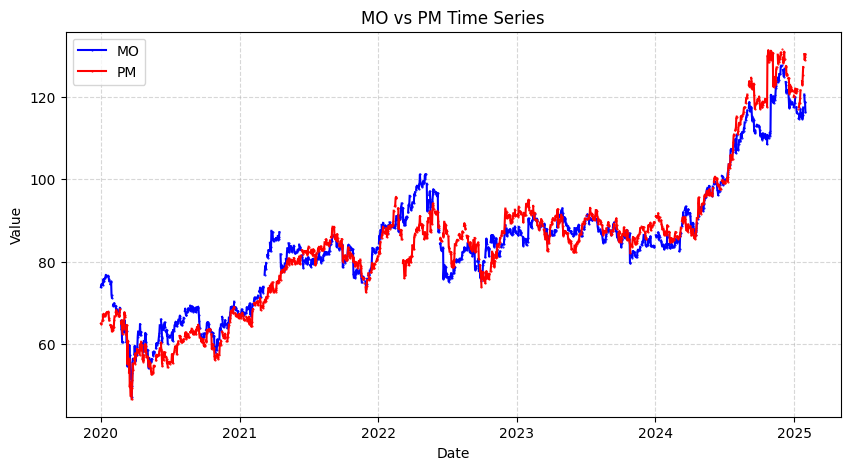

In [190]:
plot_same_axis(df, "MO", "PM",2.2562831761575657,1)

In [191]:
ticker_1, factor_1 = 'MO',2.2562831761575657
ticker_2, factor_2 = 'PM',1


ticker_1_latest = yf.Ticker(ticker_1).fast_info['lastPrice']
ticker_2_latest = yf.Ticker(ticker_2).fast_info['lastPrice']
midpoint = (ticker_1_latest*factor_1 + ticker_2_latest*factor_2)/2

print(f"ticker {ticker_1} latest price is {ticker_1_latest}")
print(f"ticker {ticker_2} latest price is {ticker_2_latest}")
print(f"Average middle is {midpoint}, which is {midpoint/factor_1} for {ticker_1} and {midpoint/factor_2} for {ticker_2}")



ticker MO latest price is 55.25
ticker PM latest price is 156.27999877929688
Average middle is 140.4698221310012, which is 62.257177474602415 for MO and 140.4698221310012 for PM


In [186]:
df['AVGO']

Date
2020-01-01           NaN
2020-01-02     27.986187
2020-01-03     27.274353
2020-01-04           NaN
2020-01-05           NaN
                 ...    
2025-01-27    202.130005
2025-01-28    207.360001
2025-01-29    206.350006
2025-01-30    215.660004
2025-01-31           NaN
Name: AVGO, Length: 1858, dtype: float64

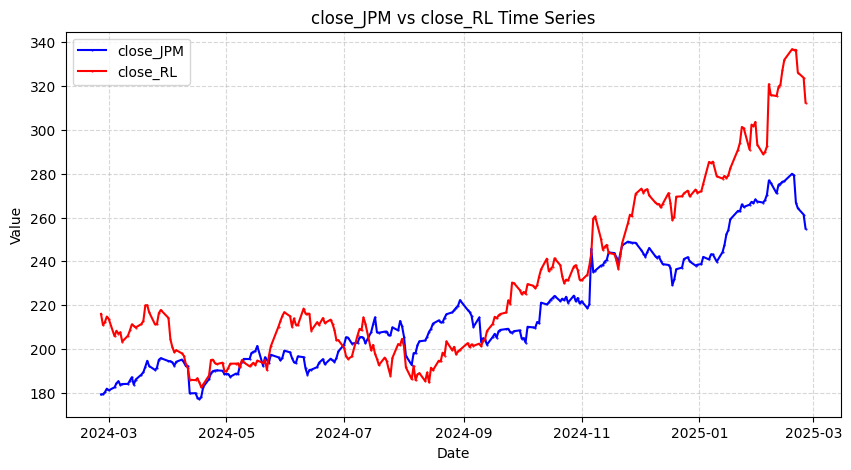

In [36]:
#download live latest data
ticker_1 = 'JPM'
ticker_2 = 'RL'
ticker_1_live = yf.Ticker(ticker_1).history(interval = '1d', period='1y')[['Close']].rename(columns={'Close':f'close_{ticker_1}'})
ticker_2_live = yf.Ticker(ticker_2).history(interval = '1d', period='1y')[['Close']].rename(columns={'Close':f'close_{ticker_2}'})
ticker = ticker_1_live.merge(ticker_2_live, left_index=True, right_index=True, how='outer')

plot_same_axis(ticker, f'close_{ticker_1}', f'close_{ticker_2}',1,1.174558)

In [ ]:
plot_same_axis(df, "MO", "PM",2.2562831761575657,1)

In [42]:
yf.Ticker('S68.SI').news

[{'id': '91635771-8c71-3bed-98c4-58ee61f58a41',
  'content': {'id': '91635771-8c71-3bed-98c4-58ee61f58a41',
   'contentType': 'STORY',
   'title': 'Singapore Exchange First Half 2025 Earnings: EPS: S$0.32 (vs S$0.26 in 1H 2024)',
   'description': '',
   'summary': 'Singapore Exchange ( SGX:S68 ) First Half 2025 Results Key Financial Results Revenue: S$682.2m (up 15% from 1H 2024...',
   'pubDate': '2025-02-07T22:28:46Z',
   'displayTime': '2025-02-07T22:28:46Z',
   'isHosted': True,
   'bypassModal': False,
   'previewUrl': None,
   'thumbnail': {'originalUrl': 'https://media.zenfs.com/en/simply_wall_st__316/78a8c60a6283aea0450523395306d38c',
    'originalWidth': 945,
    'originalHeight': 636,
    'caption': '',
    'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/5Vpve0Pc2F3m_L3fs2p_dQ--~B/aD02MzY7dz05NDU7YXBwaWQ9eXRhY2h5b24-/https://media.zenfs.com/en/simply_wall_st__316/78a8c60a6283aea0450523395306d38c',
      'width': 945,
      'height': 636,
      'tag': 'original'},
